# Spotify most stream in 2025-01-28

## Scraping Data from a website.
https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records

In [244]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns

In [170]:
url = 'https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

In [173]:
soup.find('table')

<table class="wikitable sortable plainrowheaders">
<tbody><tr>
<th>Rank
</th>
<th>Song
</th>
<th>Artist(s)
</th>
<th>Streams<br/>(billions)
</th>
<th>Release date
</th>
<th class="unsortable"><abbr title="References">Ref.</abbr>
</th></tr>
<tr>
<td style="text-align:center;">1
</td>
<th scope="row">"<a href="/wiki/Blinding_Lights" title="Blinding Lights">Blinding Lights</a>"
</th>
<td style="text-align:left;"><a href="/wiki/The_Weeknd" title="The Weeknd">The Weeknd</a></td>
<td style="text-align:center;">4.685</td>
<td style="text-align:right;"><span data-sort-value="000000002019-11-29-0000" style="white-space:nowrap">29 November 2019</span></td>
<td style="text-align:center;"><sup class="reference" id="cite_ref-2"><a href="#cite_note-2"><span class="cite-bracket">[</span>2<span class="cite-bracket">]</span></a></sup>
</td></tr>
<tr>
<td style="text-align:center;">2
</td>
<th scope="row">"<a href="/wiki/Shape_of_You" title="Shape of You">Shape of You</a>"
</th>
<td style="text-align:le

In [176]:
soup.find('table', class_ = 'wikitable sortable')

<table class="wikitable sortable">
<tbody><tr>
<th>No.
</th>
<th>Song
</th>
<th>Artist(s)
</th>
<th><abbr title="The approximate number of streams each song had when it became Spotify's most streamed song.">Streams<br/>(billions)</abbr>
</th>
<th>Release date
</th>
<th>Date achieved
</th>
<th>Days held
</th>
<th class="unsortable"><abbr title="Reference(s)">Ref.</abbr>
</th>
<th class="unsortable">Notes
</th></tr>
<tr>
<td>9
</td>
<td>"<a href="/wiki/Blinding_Lights" title="Blinding Lights">Blinding Lights</a>"</td>
<td><a href="/wiki/The_Weeknd" title="The Weeknd">The Weeknd</a></td>
<td align="center">3.332</td>
<td style="text-align:right;"><span data-sort-value="000000002019-11-29-0000" style="white-space:nowrap">29 November 2019</span></td>
<td style="text-align:right;"><span data-sort-value="000000002023-01-01-0000" style="white-space:nowrap">1 January 2023</span></td>
<td style="text-align:center;">761</td>
<td align="center"><sup class="reference" id="cite_ref-102"><a href="#ci

In [178]:
table = soup.find_all('table')[0]

In [182]:
spotify_title = table.find_all('th')

In [186]:
spotify_title_table = [title.text.strip() for title in spotify_title]

print(spotify_title)

[<th>Rank
</th>, <th>Song
</th>, <th>Artist(s)
</th>, <th>Streams<br/>(billions)
</th>, <th>Release date
</th>, <th class="unsortable"><abbr title="References">Ref.</abbr>
</th>, <th scope="row">"<a href="/wiki/Blinding_Lights" title="Blinding Lights">Blinding Lights</a>"
</th>, <th scope="row">"<a href="/wiki/Shape_of_You" title="Shape of You">Shape of You</a>"
</th>, <th scope="row">"<a href="/wiki/Someone_You_Loved" title="Someone You Loved">Someone You Loved</a>"
</th>, <th scope="row">"<a href="/wiki/As_It_Was" title="As It Was">As It Was</a>"
</th>, <th scope="row">"<a href="/wiki/Starboy_(song)" title="Starboy (song)">Starboy</a>"
</th>, <th scope="row">"<a class="mw-redirect" href="/wiki/Sunflower_(Post_Malone_song)" title="Sunflower (Post Malone song)">Sunflower</a>"
</th>, <th scope="row">"<a href="/wiki/Sweater_Weather" title="Sweater Weather">Sweater Weather</a>"
</th>, <th scope="row">"<a href="/wiki/One_Dance" title="One Dance">One Dance</a>"
</th>, <th scope="row">"<a cl

In [188]:
html_snippet = """[<th>Rank
</th>, <th>Song
</th>, <th>Artist(s)
</th>, <th>Streams<br/>(billions)
</th>, <th>Release date
</th>, <th class="unsortable"><abbr title="References">Ref.</abbr>"""

soup = BeautifulSoup(html_snippet, 'html.parser')

In [190]:
spotify_header = []
for th in soup.find_all('th'):
    column_text = th.get_text(strip=True) 
    spotify_header.append(column_text)

print(spotify_header)

['Rank', 'Song', 'Artist(s)', 'Streams(billions)', 'Release date', 'Ref.']


In [194]:
df = pd.DataFrame(columns = spotify_header)

df

,Rank,Song,Artist(s),Streams(billions),Release date,Ref.


In [196]:
column_data = table.find_all('tr')

In [198]:
for row in column_data[1:]:  # Skip the header row
    row_data = row.find_all(['td', 'th'])  # Find both 'td' and 'th' for row data
    individual_row_data = [data.text.strip() for data in row_data]

    # Handle potential empty cells or missing data
    if len(individual_row_data) == len(spotify_header):  # Check if data length matches header length
        df.loc[len(df)] = individual_row_data 
    else:
        print(f"Row with inconsistent data: {individual_row_data}")  # Log rows with inconsistent data
        # You can handle inconsistent rows as needed (e.g., skip, fill with NaN, etc.)

df = df.head(100)
df

Row with inconsistent data: ['As of 30 January 2025']


,Rank,Song,Artist(s),Streams(billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,4.685,29 November 2019,[2]
1,2,"""Shape of You""",Ed Sheeran,4.201,6 January 2017,[3]
2,3,"""Someone You Loved""",Lewis Capaldi,3.780,8 November 2018,[4]
3,4,"""As It Was""",Harry Styles,3.741,1 April 2022,[5]
4,5,"""Starboy""",The Weeknd and Daft Punk,3.717,21 September 2016,[6]
...,...,...,...,...,...,...
95,96,"""The Scientist""",Coldplay,2.179,26 May 2002,[97]
96,97,"""All I Want For Christmas Is You""",Mariah Carey,2.165,29 October 1994,[98]
97,98,"""Till I Collapse""",Eminem and Nate Dogg,2.146,26 May 2002,[99]
98,99,"""See You Again""","Tyler, the Creator and Kali Uchis",2.137,21 July 2017,[100]


# Data cleaning

In [201]:
df = df.drop("Ref.", axis=1) 

df

,Rank,Song,Artist(s),Streams(billions),Release date
0,1,"""Blinding Lights""",The Weeknd,4.685,29 November 2019
1,2,"""Shape of You""",Ed Sheeran,4.201,6 January 2017
2,3,"""Someone You Loved""",Lewis Capaldi,3.780,8 November 2018
3,4,"""As It Was""",Harry Styles,3.741,1 April 2022
4,5,"""Starboy""",The Weeknd and Daft Punk,3.717,21 September 2016
...,...,...,...,...,...
95,96,"""The Scientist""",Coldplay,2.179,26 May 2002
96,97,"""All I Want For Christmas Is You""",Mariah Carey,2.165,29 October 1994
97,98,"""Till I Collapse""",Eminem and Nate Dogg,2.146,26 May 2002
98,99,"""See You Again""","Tyler, the Creator and Kali Uchis",2.137,21 July 2017


In [203]:
# Remove double quotes from the `Song` column
df['Song'] = df['Song'].astype(str).str.replace('"', '')

# Print the first 5 rows of the DataFrame
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print column names and their data types
print(df.info())

| Rank   | Song              | Artist(s)                | Streams(billions)   | Release date      |
|:-------|:------------------|:-------------------------|:--------------------|:------------------|
| 1      | Blinding Lights   | The Weeknd               | 4.685               | 29 November 2019  |
| 2      | Shape of You      | Ed Sheeran               | 4.201               | 6 January 2017    |
| 3      | Someone You Loved | Lewis Capaldi            | 3.78                | 8 November 2018   |
| 4      | As It Was         | Harry Styles             | 3.741               | 1 April 2022      |
| 5      | Starboy           | The Weeknd and Daft Punk | 3.717               | 21 September 2016 |
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rank               100 non-null    object
 1   Song               100 non-null    object
 2   Artist(s)

In [205]:
df

,Rank,Song,Artist(s),Streams(billions),Release date
0,1,Blinding Lights,The Weeknd,4.685,29 November 2019
1,2,Shape of You,Ed Sheeran,4.201,6 January 2017
2,3,Someone You Loved,Lewis Capaldi,3.780,8 November 2018
3,4,As It Was,Harry Styles,3.741,1 April 2022
4,5,Starboy,The Weeknd and Daft Punk,3.717,21 September 2016
...,...,...,...,...,...
95,96,The Scientist,Coldplay,2.179,26 May 2002
96,97,All I Want For Christmas Is You,Mariah Carey,2.165,29 October 1994
97,98,Till I Collapse,Eminem and Nate Dogg,2.146,26 May 2002
98,99,See You Again,"Tyler, the Creator and Kali Uchis",2.137,21 July 2017


In [207]:
# Step 1: Convert "Release date" to datetime (without converting to string)
df["Release date"] = pd.to_datetime(df["Release date"], format="%d %B %Y")

# Step 2: Convert other columns to appropriate data types
df["Rank"] = df["Rank"].astype(int)
df["Song"] = df["Song"].astype(str)
df["Artist(s)"] = df["Artist(s)"].astype(str)
df["Streams(billions)"] = df["Streams(billions)"].astype(float)

# Step 3: Calculate song age in days (this will work because "Release date" is still datetime)
today = pd.to_datetime('today')
df['Days Since Release'] = (today - df['Release date']).dt.days


In [209]:
df

,Rank,Song,Artist(s),Streams(billions),Release date,Days Since Release
0,1,Blinding Lights,The Weeknd,4.685,2019-11-29,1891
1,2,Shape of You,Ed Sheeran,4.201,2017-01-06,2948
2,3,Someone You Loved,Lewis Capaldi,3.780,2018-11-08,2277
3,4,As It Was,Harry Styles,3.741,2022-04-01,1037
4,5,Starboy,The Weeknd and Daft Punk,3.717,2016-09-21,3055
...,...,...,...,...,...,...
95,96,The Scientist,Coldplay,2.179,2002-05-26,8287
96,97,All I Want For Christmas Is You,Mariah Carey,2.165,1994-10-29,11053
97,98,Till I Collapse,Eminem and Nate Dogg,2.146,2002-05-26,8287
98,99,See You Again,"Tyler, the Creator and Kali Uchis",2.137,2017-07-21,2752


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               0 non-null      int64  
 1   Song               0 non-null      object 
 2   Artist(s)          0 non-null      object 
 3   Streams(billions)  0 non-null      float64
 4   Release date       0 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 132.0+ bytes


# Exploratory Data Analysis

In [215]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(f"Average Streams: {df['Streams(billions)'].mean():.2f} billion")
print(f"Minimum Streams: {df['Streams(billions)'].min()} billion")
print(f"Maximum Streams: {df['Streams(billions)'].max()} billion")
print(f"Standard Deviation of Streams: {df['Streams(billions)'].std():.2f} billion")


Descriptive Statistics:
Average Streams: 2.65 billion
Minimum Streams: 2.131 billion
Maximum Streams: 4.685 billion
Standard Deviation of Streams: 0.48 billion


In [217]:
# Most and Least Streamed Songs
most_streamed = df.loc[df['Streams(billions)'].idxmax()]
print(f"Most Streamed Song: {most_streamed['Song']} by {most_streamed['Artist(s)']}")

least_streamed = df.loc[df['Streams(billions)'].idxmin()]
print(f"Least Streamed Song: {least_streamed['Song']} by {least_streamed['Artist(s)']}")

Most Streamed Song: Blinding Lights by The Weeknd
Least Streamed Song: Iris by Goo Goo Dolls


In [233]:
# Sort the DataFrame by "Days Since Release" in Descending order
df_sorted = df.sort_values(by="Days Since Release", ascending=False)

df_sorted

,Rank,Song,Artist(s),Streams(billions),Release date,Days Since Release
35,36,Bohemian Rhapsody,Queen,2.692,1975-10-31,17991
87,88,Don't Stop Me Now,Queen,2.220,1979-01-26,16808
79,80,Don't Stop Believin',Journey,2.269,1981-10-19,15811
60,61,Every Breath You Take,The Police,2.433,1983-05-20,15233
89,90,Take On Me,A-ha,2.204,1984-10-19,14715
...,...,...,...,...,...,...
80,81,Cold Heart (Pnau remix),Elton John and Dua Lipa with Pnau,2.267,2021-08-13,1268
3,4,As It Was,Harry Styles,3.741,2022-04-01,1037
69,70,Kill Bill,SZA,2.337,2022-12-09,785
62,63,Flowers,Miley Cyrus,2.405,2023-01-13,750


In [221]:
# Oldest and Newest Songs
oldest_song = df.loc[df['Release date'].idxmin()]
print(f"\nOldest Song: {oldest_song['Song']} by {oldest_song['Artist(s)']}")

newest_song = df.loc[df['Release date'].idxmax()]
print(f"Newest Song: {newest_song['Song']} by {newest_song['Artist(s)']}")


Oldest Song: Bohemian Rhapsody by Queen
Newest Song: Seven by Jung Kook and Latto


In [223]:
# Average Song Age
print(f"\nAverage Song Age: {df['Days Since Release'].mean():.2f} days")


Average Song Age: 4299.85 days


In [242]:
# The artist with the most songs in the top 100 list

from collections import Counter

# Split artists and count occurrences
artist_counts = Counter()
for artists in df["Artist(s)"]:
    individual_artists = [artist.strip() for artist in artists.split(" and ")]
    for artist in individual_artists:
        artist_counts[artist] += 1

# Convert to DataFrame and sort
artist_counts_df = pd.DataFrame(artist_counts.items(), columns=["Artist", "Count"]).sort_values(by="Count", ascending=False)

# Display the top artists
artist_counts_df.head(10).style.hide(axis="index")


Artist,Count
The Weeknd,5
Bruno Mars,5
Coldplay,4
Ed Sheeran,4
Dua Lipa,4
Justin Bieber,4
Imagine Dragons,3
Eminem,3
Post Malone,3
Shawn Mendes,3


In [250]:
# Artist Performance Insights
artist_total_streams = df.groupby("Artist(s)")['Streams(billions)'].sum().sort_values(ascending=False)
artist_avg_streams = df.groupby("Artist(s)")['Streams(billions)'].mean().sort_values(ascending=False)

print("Top 10 Artists by Total Streams:\n", artist_total_streams.head(10))
print("\nTop 10 Artists by Average Streams Per Song:\n", artist_avg_streams.head(10))

Top 10 Artists by Total Streams:
 Artist(s)
Ed Sheeran         12.920
The Weeknd         12.100
Bruno Mars          9.945
Imagine Dragons     8.495
Coldplay            7.524
Harry Styles        6.667
Arctic Monkeys      5.240
Dua Lipa            5.080
Justin Bieber       4.979
Eminem              4.936
Name: Streams(billions), dtype: float64

Top 10 Artists by Average Streams Per Song:
 Artist(s)
Lewis Capaldi                      3.7800
The Weeknd and Daft Punk           3.7170
Post Malone and Swae Lee           3.6910
The Neighbourhood                  3.5410
Drake with Wizkid and Kyla         3.5120
The Kid Laroi and Justin Bieber    3.4480
Harry Styles                       3.3335
Glass Animals                      3.2750
Ed Sheeran                         3.2300
Tones and I                        3.2070
Name: Streams(billions), dtype: float64


In [262]:
# Collaboration Impact
df['Collaboration'] = df['Artist(s)'].apply(lambda x: 'Yes' if ' and ' in x else 'No')
collab_avg_streams = df.groupby("Collaboration")['Streams(billions)'].mean()
print("\nSolo vs. Collaboration Average Streams:\n", collab_avg_streams)


Solo vs. Collaboration Average Streams:
 Collaboration
No     2.633184
Yes    2.706833
Name: Streams(billions), dtype: float64


In [277]:
df

,Rank,Song,Artist(s),Streams(billions),Release date,Days Since Release,Year,Collaboration
0,1,Blinding Lights,The Weeknd,4.685,2019-11-29,1891,2019,No
1,2,Shape of You,Ed Sheeran,4.201,2017-01-06,2948,2017,No
2,3,Someone You Loved,Lewis Capaldi,3.780,2018-11-08,2277,2018,No
3,4,As It Was,Harry Styles,3.741,2022-04-01,1037,2022,No
4,5,Starboy,The Weeknd and Daft Punk,3.717,2016-09-21,3055,2016,Yes
...,...,...,...,...,...,...,...,...
95,96,The Scientist,Coldplay,2.179,2002-05-26,8287,2002,No
96,97,All I Want For Christmas Is You,Mariah Carey,2.165,1994-10-29,11053,1994,No
97,98,Till I Collapse,Eminem and Nate Dogg,2.146,2002-05-26,8287,2002,Yes
98,99,See You Again,"Tyler, the Creator and Kali Uchis",2.137,2017-07-21,2752,2017,Yes


In [264]:
# Streaming Milestones
milestone_counts = {
    '3B+ Streams': (df['Streams(billions)'] >= 3).sum(),
    '4B+ Streams': (df['Streams(billions)'] >= 4).sum(),
    '5B+ Streams': (df['Streams(billions)'] >= 5).sum()
}
print("\nNumber of Songs Crossing Streaming Milestones:", milestone_counts)


Number of Songs Crossing Streaming Milestones: {'3B+ Streams': 17, '4B+ Streams': 2, '5B+ Streams': 0}


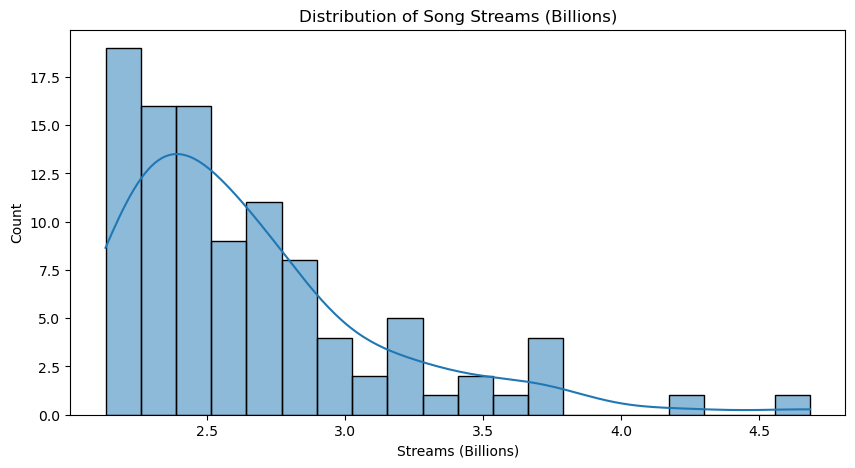

In [248]:
#Streams Distribution Analysis
plt.figure(figsize=(10,5))
sns.histplot(df['Streams(billions)'], bins=20, kde=True)
plt.title("Distribution of Song Streams (Billions)")
plt.xlabel("Streams (Billions)")
plt.ylabel("Count")
plt.show()

# Time Series Analysis

In [225]:
import matplotlib.pyplot as plt
from datetime import date

In [254]:
# Convert 'Release date' to datetime
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')
df['Year'] = df['Release date'].dt.year  # Extract year

In [279]:
df

,Rank,Song,Artist(s),Streams(billions),Release date,Days Since Release,Year,Collaboration
0,1,Blinding Lights,The Weeknd,4.685,2019-11-29,1891,2019,No
1,2,Shape of You,Ed Sheeran,4.201,2017-01-06,2948,2017,No
2,3,Someone You Loved,Lewis Capaldi,3.780,2018-11-08,2277,2018,No
3,4,As It Was,Harry Styles,3.741,2022-04-01,1037,2022,No
4,5,Starboy,The Weeknd and Daft Punk,3.717,2016-09-21,3055,2016,Yes
...,...,...,...,...,...,...,...,...
95,96,The Scientist,Coldplay,2.179,2002-05-26,8287,2002,No
96,97,All I Want For Christmas Is You,Mariah Carey,2.165,1994-10-29,11053,1994,No
97,98,Till I Collapse,Eminem and Nate Dogg,2.146,2002-05-26,8287,2002,Yes
98,99,See You Again,"Tyler, the Creator and Kali Uchis",2.137,2017-07-21,2752,2017,Yes


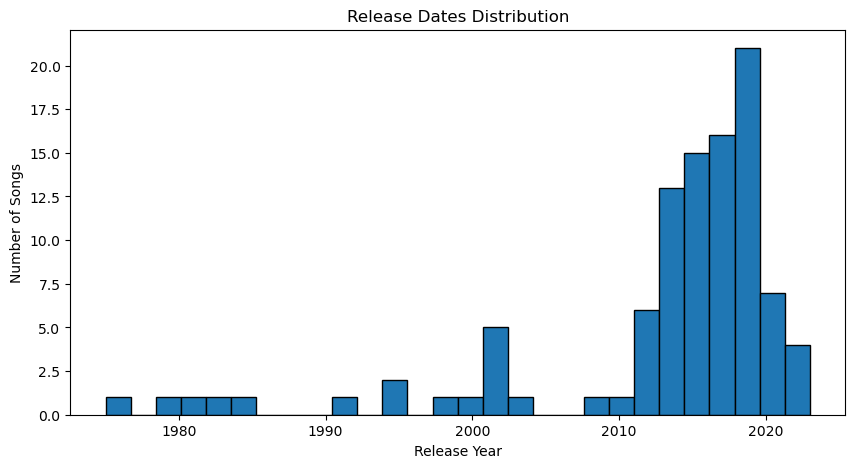

In [226]:
# Observe trends in release dates (Histogram)
plt.figure(figsize=(10, 5)) 
plt.hist(df['Release date'].dt.year, bins=len(df['Release date'].dt.year.unique()), edgecolor='black')
plt.xlabel("Release Year")
plt.ylabel("Number of Songs")
plt.title("Release Dates Distribution")
plt.show()

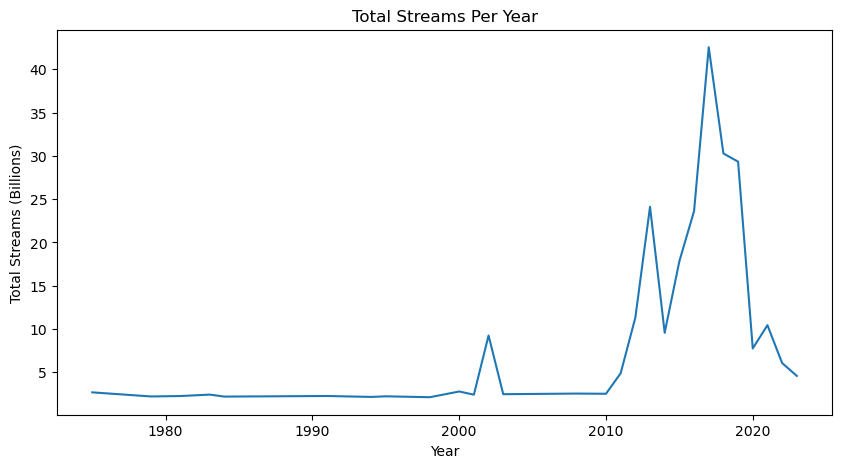

In [260]:
# Trends Over Time
plt.figure(figsize=(10,5))
sns.lineplot(data=df.groupby("Year")["Streams(billions)"].sum())
plt.title("Total Streams Per Year")
plt.xlabel("Year")
plt.ylabel("Total Streams (Billions)")
plt.show()

In [229]:
# Compare release dates of high and low streams (Boxplot)
high_streams = df[df['Streams(billions)'] >= df['Streams(billions)'].quantile(0.75)]
low_streams = df[df['Streams(billions)'] <= df['Streams(billions)'].quantile(0.25)]

/var/folders/hh/rxb6n8jd2wb8425_xppswjj40000gn/T/ipykernel_993/2618127927.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([high_streams['Release date'].dt.year, low_streams['Release date'].dt.year], labels=['High Streams', 'Low Streams'])


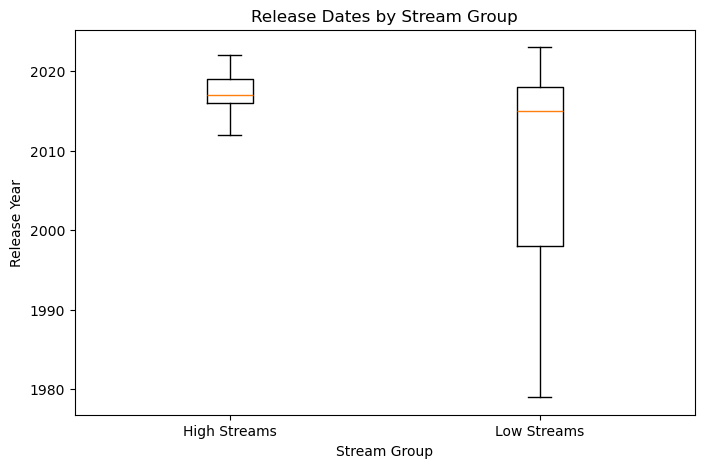

In [231]:
plt.figure(figsize=(8, 5))
plt.boxplot([high_streams['Release date'].dt.year, low_streams['Release date'].dt.year], labels=['High Streams', 'Low Streams'])
plt.xlabel("Stream Group")
plt.ylabel("Release Year")
plt.title("Release Dates by Stream Group")
plt.show()

In [164]:
df

,Rank,Song,Artist(s),Streams(billions),Release date
0,1,Blinding Lights,The Weeknd,4.685,2019-11-29
1,2,Shape of You,Ed Sheeran,4.201,2017-01-06
2,3,Someone You Loved,Lewis Capaldi,3.780,2018-11-08
3,4,As It Was,Harry Styles,3.741,2022-04-01
4,5,Starboy,The Weeknd and Daft Punk,3.717,2016-09-21
...,...,...,...,...,...
95,96,The Scientist,Coldplay,2.179,2002-05-26
96,97,All I Want For Christmas Is You,Mariah Carey,2.165,1994-10-29
97,98,Till I Collapse,Eminem and Nate Dogg,2.146,2002-05-26
98,99,See You Again,"Tyler, the Creator and Kali Uchis",2.137,2017-07-21


## --- Insights summary ---
1. Most songs fall between 2B-3B streams, but a few extreme hits stand out.
2. Top artists by total streams are global superstars, but some have fewer songs with high impact.
3. Older songs may still dominate, indicating a strong catalog effect.
4. Collaborations may boost streaming performance compared to solo songs.
5. Only a few songs surpass 4B+ streams, making them elite-tier hits.
